In [2]:
from firedrake import *
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [3]:
mesh = UnitSquareMesh(40, 40, quadrilateral=True)

In [4]:
V = FunctionSpace(mesh, "DQ", 1)
W = VectorFunctionSpace(mesh, "CG", 1)

In [5]:
x, y = SpatialCoordinate(mesh)

r = sqrt(pow(x-0.5, 2) + pow(y-0.5, 2))

velocity = as_vector(( (0.5 - y ) , ( x - 0.5) ))
u = Function(W).interpolate(velocity)


In [6]:
bell_r0 = 0.15; bell_x0 = 0.25; bell_y0 = 0.5
cone_r0 = 0.15; cone_x0 = 0.5; cone_y0 = 0.25
cyl_r0 = 0.15; cyl_x0 = 0.5; cyl_y0 = 0.75
slot_left = 0.475; slot_right = 0.525; slot_top = 0.85

bell = 0.25*(1+cos(math.pi*min_value(sqrt(pow(x-bell_x0, 2) + pow(y-bell_y0, 2))/bell_r0, 1.0)))
cone = 1.0 - min_value(sqrt(pow(x-cone_x0, 2) + pow(y-cone_y0, 2))/cyl_r0, 1.0)
slot_cyl = conditional(sqrt(pow(x-cyl_x0, 2) + pow(y-cyl_y0, 2)) < cyl_r0,
             conditional(And(And(x > slot_left, x < slot_right), y < slot_top),
               0.0, 1.0), 0.0)

In [22]:
q = Function(V).interpolate(1.0 + bell + cone + slot_cyl )
q_init = Function(V).assign(q)

In [ ]:
#

In [23]:
qs = []

In [24]:
T = 2*math.pi
dt = T/12000
dtc = Constant(dt)
q_in = Constant(1.0)

In [25]:
dq_trial = TrialFunction(V)
phi = TestFunction(V)
a = phi*dq_trial*dx

In [26]:
n = FacetNormal(mesh)
un = 0.5*(dot(u, n) + abs(dot(u, n)))

In [28]:
L1 = dtc*(q*div(phi*u)*dx
          - conditional(dot(u, n) < 0, phi*dot(u, n)*q_in, 0.0)*ds
          - conditional(dot(u, n) > 0, phi*dot(u, n)*q, 0.0)*ds
          - (phi('+') - phi('-'))*(un('+')*q('+') - un('-')*q('-'))*dS)

In [29]:
q1 = Function(V); q2 = Function(V)
L2 = replace(L1, {q: q1}); L3 = replace(L1, {q: q2})

In [30]:
dq = Function(V)

In [31]:
params = {'ksp_type': 'preonly', 'pc_type': 'bjacobi', 'sub_pc_type': 'ilu'}
prob1 = LinearVariationalProblem(a, L1, dq)
solv1 = LinearVariationalSolver(prob1, solver_parameters=params)
prob2 = LinearVariationalProblem(a, L2, dq)
solv2 = LinearVariationalSolver(prob2, solver_parameters=params)
prob3 = LinearVariationalProblem(a, L3, dq)
solv3 = LinearVariationalSolver(prob3, solver_parameters=params)

In [32]:
limiter = VertexBasedLimiter(V)

In [33]:
t = 0.0
step = 0
output_freq = 20

In [34]:
DG0 = FunctionSpace(mesh, "DG", 0)
qbar = Function(DG0)



In [35]:
limiter.apply(q)

In [36]:
if step % output_freq == 0:
    qs.append(q.copy(deepcopy=True))
    print("t=", t)

#Apply the limiter to q first.
limiter.apply(q)
print(q.dat.data.max())


#Main body

while t < T - 0.5*dt:
    solv1.solve()
    q1.assign(q + dq)
    limiter.apply(q1)

    solv2.solve()
    q1.assign(q1+dq)
    limiter.apply(q1)
    q2.assign(0.75*q + 0.25*(q1))
    limiter.apply(q2)

    solv3.solve()
    q2.assign(q2+dq)
    limiter.apply(q2)
    q.assign((1.0/3.0)*q + (2.0/3.0)*(q2))
    limiter.apply(q)


    print(q.dat.data.max())
    step += 1
    t += dt

    if step % output_freq == 0:
        qs.append(q.copy(deepcopy=True))
        print("t=", t)

t= 0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.010471975511965981
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.02094395102393195
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.0314159265358979
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.04188790204786392
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.05235987755982994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.06283185307179595
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.07330382858376183
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.08377580409572771
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
t= 0.0942477796076936
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

In [37]:
L2_err = sqrt(assemble((q - q_init)*(q - q_init)*dx))
L2_init = sqrt(assemble(q_init*q_init*dx))
print(L2_err/L2_init)

8.088873224123607e-16


In [38]:
nsp = 16
fn_plotter = FunctionPlotter(mesh, num_sample_points=nsp)

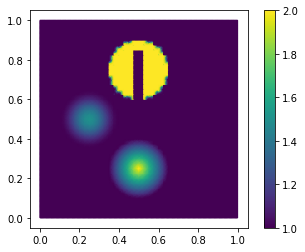

In [118]:
fig, axes = plt.subplots()
axes.set_aspect('equal')
colors = tripcolor(q_init, num_sample_points=nsp, vmin=1, vmax=2, axes=axes)
fig.colorbar(colors)

In [119]:
def animate(q):
    colors.set_array(fn_plotter(q))

In [120]:
interval = 1e3 * output_freq * dt
animation = FuncAnimation(fig, animate, frames=qs, interval=interval)
#try:
    #animation.save("DG_advection_oscitrail3.mp4", writer="ffmpeg")
#except:
    #print("Failed to write movie! Try installing `ffmpeg`.")